<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [3]:
import numpy as np  
import pandas as pd  # для работы с таблицами
Δ = 3
𝜎 = 15
# Квантиль нормального распределения для уровня доверия 95% равен 1,96
n = 𝜎 * 1.96/3
print('Минимально необходимый объем выборки: ',int(n))

Минимально необходимый объем выборки:  9


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [3]:
import scipy.stats as st
n = 25
x = 130
𝜎 = 15
Δ = 𝜎 * 2.33/n ** (0.5)
print('Длина полученного доверительного интервала  L = ',int(2*Δ))

Длина полученного доверительного интервала  L =  13


<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [4]:
import scipy.stats as st
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#Критерий Стьюдента (t-test)
t, p_value = st.ttest_ind(mens, womens) 
t, p_value
# Т.к. полученное значение P_Value значительно меньше уровня значимости, то делаем вывод что различия значимы

(3.6635841716708892, 0.00024875321033580573)

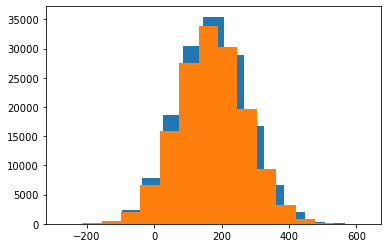

In [5]:
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
plt.hist(mens, bins=15);
plt.hist(womens, bins=15);

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [17]:
sigma = 150  # Стандартное отклонение
Z = 1.96     # Квантиль нормального распределения. 
Delta = 50   # Погрешность

In [19]:
N = int(((sigma*Z)/Delta)**2)
print('объем необходимой выборки равен: ',N)

объем необходимой выборки равен:  34


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

Верные ответы волшебника  Неверные ответы
Дождь                         10               15
Солнце                        39               34

In [22]:
import scipy.stats as st
significance = 0.05
oddsratio, pvalue = st.fisher_exact(observations)#Возможно пригодится эта функция.
print('p-value=%.6f, significance=%.2f\n' % (pvalue, significance))
if pvalue < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Волшебник настоящий!')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Он шарлотан!""" % (significance))

p-value=0.354180, significance=0.05

На 0.05 уровене значимости, мы принимаем нулевые гипотезы.  
            Он шарлотан!


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [28]:
def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m - h, m, m + h

In [30]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

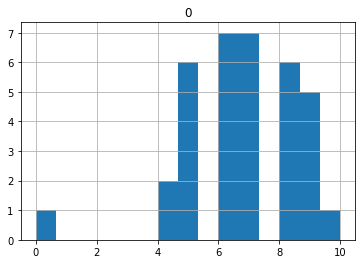

In [40]:
df = pd.DataFrame(data)
df.hist(bins=15)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

11.865233896372924 4.623319592204015e-25


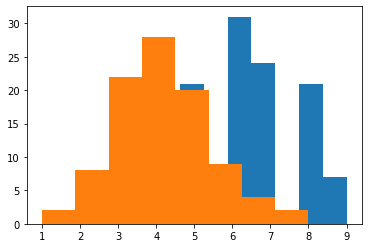

In [37]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

t, p_value = st.ttest_ind(A, B) 
print(t, p_value)
C = [A, B]
plt.hist(A, bins=8);
plt.hist(B, bins=8);


# Данные выборки не принадлежат одному множеству.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

# Беря во внимание стандартный порог уровня значимости в 5% и имея полученный уровень в 3% мы может отклонить нулевую гипотезу. Следовательно наше распределение  -  ненормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [6]:
import scipy.stats as st
np.random.seed(11)
A = st.norm.rvs(scale=15, loc=169, size=300)
B = st.norm.rvs(scale=14, loc=171.4, size=300)

#Критерий Стьюдента (t-test)

t, p_value = st.ttest_ind(A, B)
t, p_value

(-1.95300880485141, 0.051284593140469285)

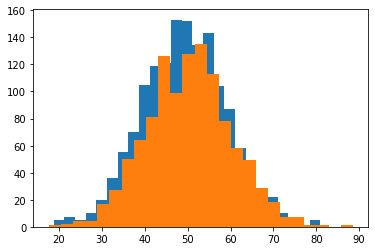

In [18]:
plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

# Т.к. мы получили уровень значимости равный 5,12% при нешем пороге в 5%, то делаем вывод что данные все таки не отличаются. 
# Минимальное значение p_value при котором различия были бы значимы в нашем случае это величина меньше 5%. 